In [2]:
# imports
import torch
from draw_connectome import draw_connectome
from utils import ROOT_DIR
from torch_geometric.data import Data
import os

In [4]:
# load the raw data
graph_tensors = torch.load(os.path.join(ROOT_DIR, 'preprocessing', 'graph_tensors.pt'))

# make the graph
graph = Data(**graph_tensors)

In [5]:
# investigate the graph
print("Attributes:", "\n", graph.keys, "\n",
      f"Num. nodes {graph.num_nodes}, Num. edges {graph.num_edges}, " 
      f"Num. node features {graph.num_node_features}", end="\n")
print(f"\tHas isolated nodes: {graph.has_isolated_nodes()}")
print(f"\tHas self-loops: {graph.has_self_loops()}")
print(f"\tIs undirected: {graph.is_undirected()}")
print(f"\tIs directed: {graph.is_directed()}") 

Attributes: 
 ['pos', 'edge_index', 'id_neuron', 'edge_attr', 'x', 'node_type', 'y'] 
 Num. nodes 302, Num. edges 4396, Num. node features 1024
	Has isolated nodes: False
	Has self-loops: True
	Is undirected: False
	Is directed: True


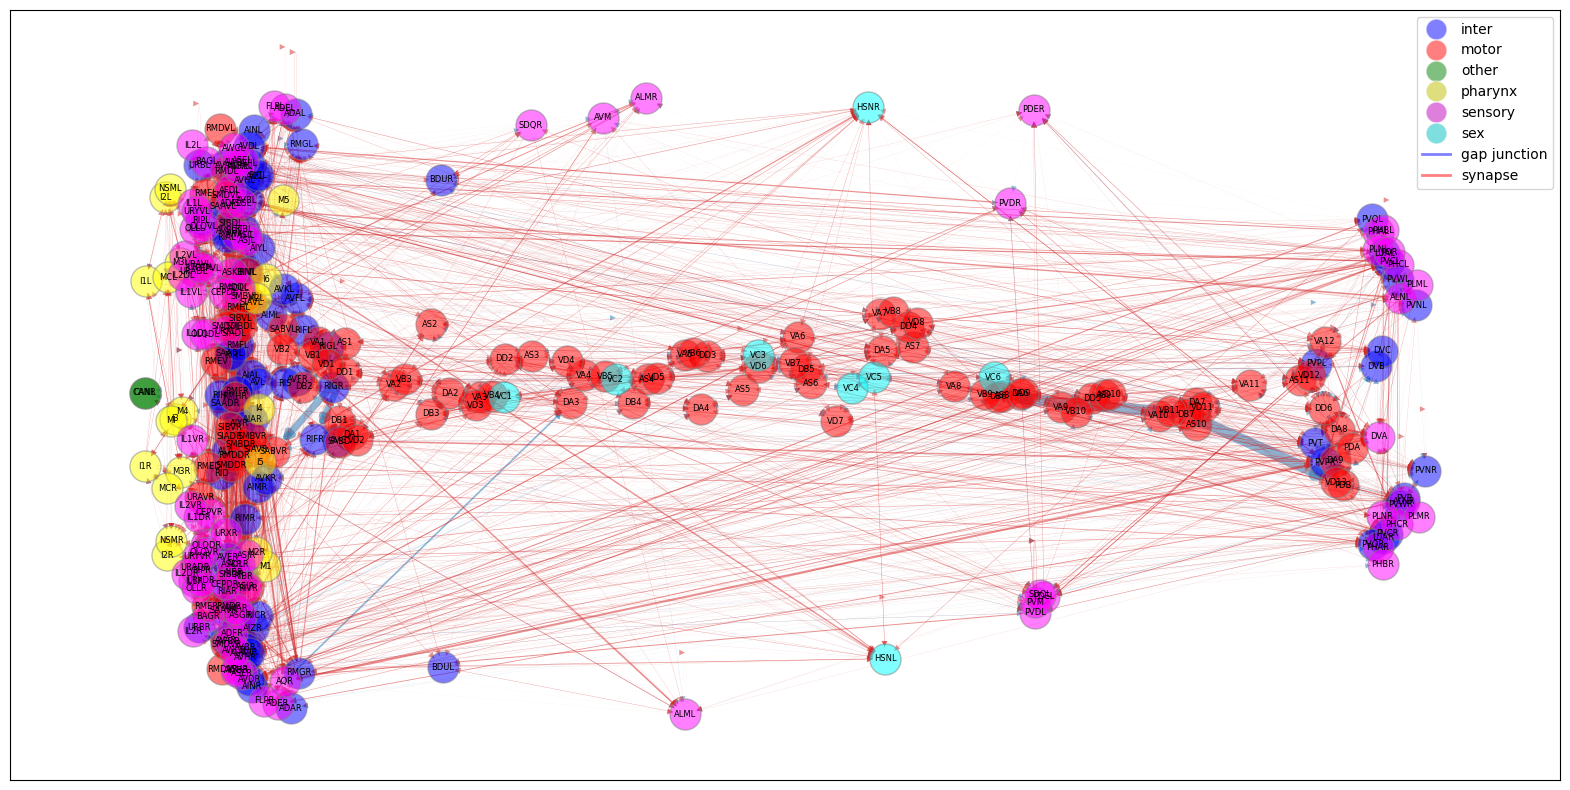

In [6]:
# draw the connectome
draw_connectome(graph)